In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
from scipy import stats

In [31]:
# 11.1 Correlation

# First read in the data for the average yearly temperature at the Sonnblick, Austria’s
# highest meteorological observatory, from the file AvgTemp.xls.
# Then calculate the Pearson and Spearman correlation, and Kendall’s tau, for the
# temperature vs. year.

In [4]:
df = pd.read_excel('data/AvgTemp.xls')

In [7]:
df.describe()

,year,AvgTmp
count,122.000000,122.000000
mean,1947.500000,-5.931148
std,35.362409,0.774605
min,1887.000000,-7.800000
25%,1917.250000,-6.500000
50%,1947.500000,-6.000000
75%,1977.750000,-5.400000
max,2008.000000,-4.200000


In [28]:
for method in ['pearson', 'spearman', 'kendall']:
    coeff = df.corr(method=method).iloc[0,1]
    print(f'{method.capitalize()} correlation coefficient: {coeff:5.3f}')

Pearson correlation coefficient: 0.639
Spearman correlation coefficient: 0.629
Kendall correlation coefficient: 0.459


In [30]:
# 11.2 Regression

# For the same data, calculate the yearly increase in temperature, assuming a linear
# increase with time. Is this increase significant?

In [42]:
# statsmodels allows users to fit statistical models using R-style formulas
model = sm.ols('AvgTmp ~ year', df)
results = model.fit()
print(results.summary())

# printing the result shows a yearly increase in temperature of 0.014 +/- 0.003 per year

                            OLS Regression Results                            
Dep. Variable:                 AvgTmp   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     82.74
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.43e-15
Time:                        16:15:59   Log-Likelihood:                -109.46
No. Observations:                 122   AIC:                             222.9
Df Residuals:                     120   BIC:                             228.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.1840      2.996    -11.074      0.0

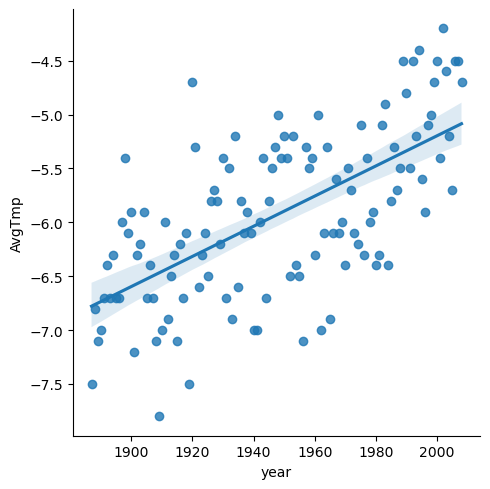

In [39]:
# Plot confidence intervals using Seaborn
sns.lmplot(x='year', y='AvgTmp', data=df)
plt.show()

In [45]:
# Is the increase in temperature significant?
# Yes! Using the 5% sigificance level, p < 0.05.
gradient_pvalue = results.pvalues['year']
gradient_pvalue

2.426320749907803e-15

In [52]:
# Under the null hypothesis that there is no relationship between temperature and year,
# we would expect the the gradient to be zero.
# Because the confidence interval at the 5% significance level does not overlap zero,
# we can reject the null hypothesis. Suggests that there is a statistically significant
# relationship between year and temperature:

interval_product = np.prod(results.conf_int().loc['year'])
interval_product

0.00018654736137877894

In [32]:
# 11.3 Normality Check

# For the data from the regression model, check if the model is ok by testing if the
# residuals are normally distributed (e.g., by using the Kolmogorov–Smirnov test).

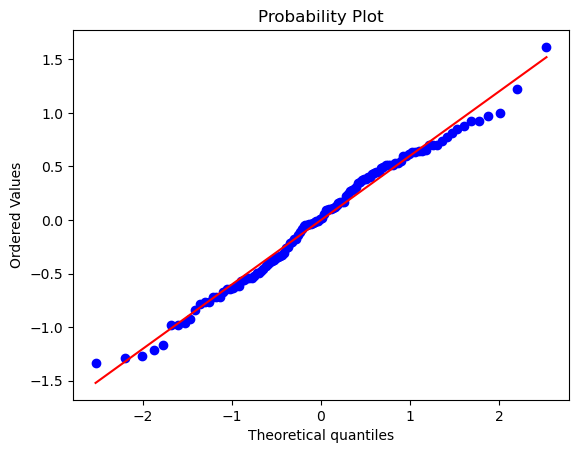

In [54]:
# Get the values for the residuals
res_data = results.resid

# Generates a probability plot of sample data against the quantiles 
# of the normal distribution (dist='norm' by default)
stats.probplot(res_data, plot=plt)
plt.show()

In [60]:
# Perform a normality test
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce
# an omnibus test of normality.
_, pVal = stats.normaltest(res_data)
if pVal < 0.05:
    print(f'The residuals are NOT normally distributed (p = {pVal})')
else:
    print(f'p-val of {pVal:5.3f}, so residuals are normally distributed.')

p-val of 0.401, so residuals are normally distributed.
